# Convergence Tests
## Supplemental material for _Covalent charge-neutral muon state in antiferromagnetic MnF<sub>2</sub>_

M. H. Dehn,<sup>1,2,3 </sup> R. Scheuermann,<sup>4</sup> J. K. Shenton,<sup>5,*</sup>  S. J. Blundell,<sup>6</sup> W. A. MacFarlane,<sup>2,3,7</sup> D. Prabhakaran,<sup>6</sup> A. Suter,<sup>4</sup> N. A. Spaldin<sup>5</sup>and R. F. Kiefl<sup>1,2,3,&sect;</sup>


<sup>1</sup>Department of Physics and Astronomy, University of British Columbia, Vancouver, BC V6T 1Z1, Canada    
<sup>2</sup>Stewart Blusson Quantum Matter Institute, University of British Columbia, Vancouver, BC V6T 1Z4, Canada    
<sup>3</sup><span style="font-variant:small-caps;">Triumf</span>, Vancouver, BC V6T 2A3, Canada   
<sup>4</sup>Laboratory for Muon Spectroscopy, Paul Scherrer Institute, Villigen AG, Switzerland    
<sup>5</sup>Department of Materials, ETH Zurich, CH-8093 Zürich, Switzerland   
<sup>6</sup>Oxford University Department of Physics, Clarendon Laboratory, Parks Road, Oxford OX1 3PU, United Kingdom   
<sup>7</sup>Department of Chemistry, University of British Columbia, Vancouver, BC, V6T 1Z1, Canada    
<sup>*</sup> For queries about the supplemental material in this repository contact [J. Kane Shenton](mailto:kane.shenton@stfc.ac.uk).

### Summary

Here we show the results of the tests for convergence of total energies, forces, lattice constants with respect to $k$-point sampling and plane-wave energy cut off. We show the results for three different exchange-correlation functionals (LDA, PBEsol and SCAN), though in the paper only focus on the PBEsol functional. 

We find that, for the PBEsol functional, the plane-wave cut off and _k_-point sampling used in the paper (700 eV and 6x6x8 in the primitive cell) are very well-converged. Specifically, the errors in lattice constants, forces due to the finite basis and _k_-point sampling become negligible.



### Computational Details
The following computational setup was used throughout the following tests for convergence:

* DFT code: VASP version 5.4.4
* Hubbard U<sub>eff</sub> correction:
  * LDA: 4 eV
  * PBEsol: 4 eV
  * SCAN: 0 eV
* The following PAWs were used:
  * `Mn : PAW_PBE Mn_pv 02Aug2007`
  * `F  : PAW_PBE F 08Apr2002`

Further details can be found by inspecting the provided INCAR, KPOINTS, POSCAR or OUTCAR files for each convergence run in the subdirectory: `convergence`.

In [1]:
basedir = './convergence'

### Imports

In [2]:
from ase.io import read, write
from ase import Atoms

import numpy as np

from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.io.vasp import Vasprun
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('./plots_style.mplstyle')


%load_ext autoreload
%autoreload 2

### Parameters

In [3]:
functionals = ['lda', 'pbesol', 'scan']

# A U in reasonable range for each functional 
# -- allows us to get a pretty good convergence estimate
# for encuts and k-points.
reasonable_Ueffs = {'lda' : 4,
                    'pbesol': 4,
                    'scan': 0}
markers = {'lda' : 'o', 'pbesol': '^', 'scan': 's'}
colours = {'lda' : 'C0', 'pbesol': 'C1', 'scan': 'C2'}


# Experimental lattice parameters from https://doi.org/10.1107/S0108768190008370
# (Neutrons @ 15 K)
experimental_a = 4.8736
experimental_c = 3.3000

## Plane-wave cut off

Read in the data

In [4]:
encuts = [400, 500 ,550, 600, 650, 700, 750, 800, 900]

E_encut_runs = {}

for xc in functionals:
    runs_encut = []
    for encut in encuts:
        U_Mn = reasonable_Ueffs[xc]
        print(f"xc: {xc}, ENCUT: {encut} eV")
        directory = f'{basedir}/{xc}/encut-{encut}/scf/'
        
        run = Vasprun(directory + 'vasprun.xml', parse_potcar_file=False)
        
        runs_encut.append(run)
        
    E_encut_runs[xc] = runs_encut

xc: lda, ENCUT: 400 eV
xc: lda, ENCUT: 500 eV
xc: lda, ENCUT: 550 eV
xc: lda, ENCUT: 600 eV
xc: lda, ENCUT: 650 eV
xc: lda, ENCUT: 700 eV
xc: lda, ENCUT: 750 eV
xc: lda, ENCUT: 800 eV
xc: lda, ENCUT: 900 eV
xc: pbesol, ENCUT: 400 eV
xc: pbesol, ENCUT: 500 eV
xc: pbesol, ENCUT: 550 eV
xc: pbesol, ENCUT: 600 eV
xc: pbesol, ENCUT: 650 eV
xc: pbesol, ENCUT: 700 eV
xc: pbesol, ENCUT: 750 eV
xc: pbesol, ENCUT: 800 eV
xc: pbesol, ENCUT: 900 eV
xc: scan, ENCUT: 400 eV
xc: scan, ENCUT: 500 eV
xc: scan, ENCUT: 550 eV
xc: scan, ENCUT: 600 eV
xc: scan, ENCUT: 650 eV
xc: scan, ENCUT: 700 eV
xc: scan, ENCUT: 750 eV
xc: scan, ENCUT: 800 eV
xc: scan, ENCUT: 900 eV


#### Total energies

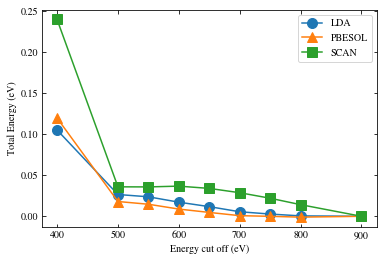

In [5]:
fig, ax = plt.subplots()

for xc in functionals:
    totens = np.array([run.final_energy for run in E_encut_runs[xc]])
    ax.plot(encuts, totens - totens[-1], marker=markers[xc], color=colours[xc],label=f'{xc}'.upper())
ax.set_xlabel('Energy cut off (eV)')
ax.set_ylabel('Total Energy (eV)')
ax.legend()

#### Lattice parameters

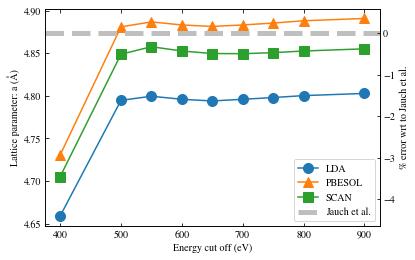

In [6]:
fig, ax = plt.subplots()

for xc in functionals:
    a = np.array([run.final_structure.lattice.a for run in E_encut_runs[xc]])
    ax.plot(encuts, a, marker=markers[xc], color=colours[xc],label=f'{xc}'.upper())
    
# experimental line:
ax.axhline(experimental_a,
            linewidth=5,
            linestyle = '--',
            color = '0.75',
            label='Jauch et al.')

ax.set_xlabel('Energy cut off (eV)')
ax.set_ylabel('Lattice parameter: a (Å)')

# show the % error wrt experiment on the right:
y1, y2=ax.get_ylim()
ax2=ax.twinx()
y1_rel = 100*(y1 - experimental_a) / experimental_a
y2_rel = 100*(y2 - experimental_a) / experimental_a

ax2.set_ylim(y1_rel, y2_rel)
ax2.set_ylabel('% error wrt to Jauch et al.')

ax.legend()

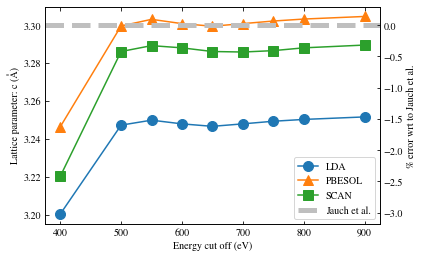

In [7]:
fig, ax = plt.subplots()

for xc in functionals:
    c = np.array([run.final_structure.lattice.c for run in E_encut_runs[xc]])
    ax.plot(encuts, c, marker=markers[xc], color=colours[xc],label=f'{xc}'.upper())
    
# experimental line:
ax.axhline(experimental_c,
            linewidth=5,
            linestyle = '--',
            color = '0.75',
            label='Jauch et al.')

ax.set_xlabel('Energy cut off (eV)')
ax.set_ylabel('Lattice parameter: c (Å)')

# show the % error wrt experiment on the right:
y1, y2=ax.get_ylim()
ax2=ax.twinx()
y1_rel = 100*(y1 - experimental_c) / experimental_c
y2_rel = 100*(y2 - experimental_c) / experimental_c

ax2.set_ylim(y1_rel, y2_rel)
ax2.set_ylabel('% error wrt to Jauch et al.')

ax.legend()

#### Forces

Since we started all of them off with the same initial structures, let's see what the initial forces were for that structure:

/home/jks/miniconda3/envs/mnf2_paper/lib/python3.10/site-packages/pymatgen/io/vasp/outputs.py:523: UserWarning: XML is malformed. Parsing has stopped but partial data is available.
  warnings.warn(


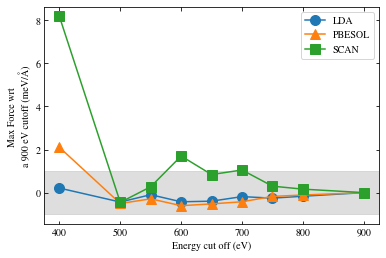

In [8]:
fig, ax = plt.subplots()



for xc in functionals:
    maxforces_encut = []
    for encut in encuts:
        U_Mn = reasonable_Ueffs[xc]
        directory = f'{basedir}/{xc}/encut-{encut}/geom-1/'
        
        run = Vasprun(directory + 'vasprun.xml', parse_potcar_file=False, exception_on_bad_xml=False)
        
        forces = run.ionic_steps[0]['forces']
        max_force = 1000*np.linalg.norm(forces, axis=1).max() # convert to meV/A

        maxforces_encut.append(max_force)
                
    # plot !    
    ax.plot(encuts, np.array(maxforces_encut) - maxforces_encut[-1],
            marker=markers[xc], color=colours[xc],
            label=f'{xc}'.upper())
ax.set_xlabel('Energy cut off (eV)')
ax.set_ylabel('Max Force wrt \na 900 eV cutoff (meV/Å)')
ax.axhspan(-1, 1, color='0.75', alpha=0.5)

ax.legend()

## $k$-points

Read in the data

In [9]:
kpts_ab = range(1,8)
encut = 600

kpt_runs = {}

for xc in functionals:
    runs_kpts = []
    for ka in kpts_ab:
        # get kpoints in c direction (shorter)
        kc = round(1.5*ka)
        kpts = (ka, ka, kc)
        
        U_Mn = reasonable_Ueffs[xc]
        print(f"xc: {xc}, kpts: {kpts}")
        directory = f'{basedir}/{xc}/kpts-{ka}x{ka}x{kc}/scf/'
        run = Vasprun(directory + 'vasprun.xml', parse_potcar_file=False)
        
        runs_kpts.append(run)
        
    kpt_runs[xc] = runs_kpts

xc: lda, kpts: (1, 1, 2)
xc: lda, kpts: (2, 2, 3)
xc: lda, kpts: (3, 3, 4)
xc: lda, kpts: (4, 4, 6)
xc: lda, kpts: (5, 5, 8)
xc: lda, kpts: (6, 6, 9)
xc: lda, kpts: (7, 7, 10)
xc: pbesol, kpts: (1, 1, 2)
xc: pbesol, kpts: (2, 2, 3)
xc: pbesol, kpts: (3, 3, 4)
xc: pbesol, kpts: (4, 4, 6)
xc: pbesol, kpts: (5, 5, 8)
xc: pbesol, kpts: (6, 6, 9)
xc: pbesol, kpts: (7, 7, 10)
xc: scan, kpts: (1, 1, 2)
xc: scan, kpts: (2, 2, 3)
xc: scan, kpts: (3, 3, 4)
xc: scan, kpts: (4, 4, 6)
xc: scan, kpts: (5, 5, 8)
xc: scan, kpts: (6, 6, 9)
xc: scan, kpts: (7, 7, 10)


#### Total energies

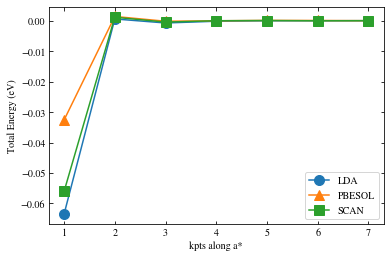

In [10]:
fig, ax = plt.subplots()

for xc in functionals:
    totens = np.array([run.final_energy for run in kpt_runs[xc]])
    ax.plot(kpts_ab, totens - totens[-1], marker=markers[xc], color=colours[xc],label=f'{xc}'.upper())
ax.set_xlabel('kpts along a*')
ax.set_ylabel('Total Energy (eV)')
ax.legend()

#### Lattice parameters

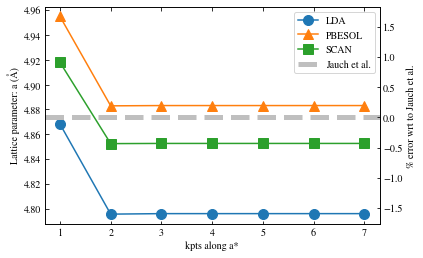

In [11]:
fig, ax = plt.subplots()

for xc in functionals:
    a = np.array([run.final_structure.lattice.a for run in kpt_runs[xc]])
    ax.plot(kpts_ab, a, marker=markers[xc], color=colours[xc],label=f'{xc}'.upper())
    
# experimental line:
ax.axhline(experimental_a,
            linewidth=5,
            linestyle = '--',
            color = '0.75',
            label='Jauch et al.')

ax.set_xlabel('kpts along a*')
ax.set_ylabel('Lattice parameter: a (Å)')

# show the % error wrt experiment on the right:
y1, y2=ax.get_ylim()
ax2=ax.twinx()
y1_rel = 100*(y1 - experimental_a) / experimental_a
y2_rel = 100*(y2 - experimental_a) / experimental_a

ax2.set_ylim(y1_rel, y2_rel)
ax2.set_ylabel('% error wrt to Jauch et al.')

ax.legend()

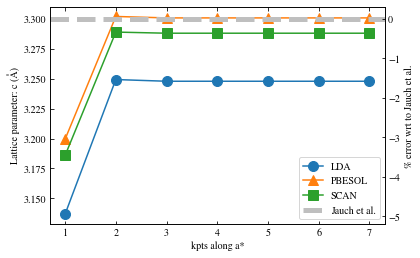

In [12]:
fig, ax = plt.subplots()

for xc in functionals:
    c = np.array([run.final_structure.lattice.c for run in kpt_runs[xc]])
    ax.plot(kpts_ab, c, marker=markers[xc], color=colours[xc],label=f'{xc}'.upper())
    
# experimental line:
ax.axhline(experimental_c,
            linewidth=5,
            linestyle = '--',
            color = '0.75',
            label='Jauch et al.')

ax.set_xlabel('kpts along a*')
ax.set_ylabel('Lattice parameter: c (Å)')

# show the % error wrt experiment on the right:
y1, y2=ax.get_ylim()
ax2=ax.twinx()
y1_rel = 100*(y1 - experimental_c) / experimental_c
y2_rel = 100*(y2 - experimental_c) / experimental_c

ax2.set_ylim(y1_rel, y2_rel)
ax2.set_ylabel('% error wrt to Jauch et al.')

ax.legend()

#### Forces

Since we started all of them off with the same initial structures, let's see what the initial forces were for that structure:

xc: lda, kpts: (1, 1, 2)
xc: lda, kpts: (2, 2, 3)
xc: lda, kpts: (3, 3, 4)
xc: lda, kpts: (4, 4, 6)
xc: lda, kpts: (5, 5, 8)
xc: lda, kpts: (6, 6, 9)
xc: lda, kpts: (7, 7, 10)
xc: pbesol, kpts: (1, 1, 2)
xc: pbesol, kpts: (2, 2, 3)
xc: pbesol, kpts: (3, 3, 4)
xc: pbesol, kpts: (4, 4, 6)
xc: pbesol, kpts: (5, 5, 8)
xc: pbesol, kpts: (6, 6, 9)
xc: pbesol, kpts: (7, 7, 10)
xc: scan, kpts: (1, 1, 2)
xc: scan, kpts: (2, 2, 3)
xc: scan, kpts: (3, 3, 4)
xc: scan, kpts: (4, 4, 6)
xc: scan, kpts: (5, 5, 8)
xc: scan, kpts: (6, 6, 9)
xc: scan, kpts: (7, 7, 10)


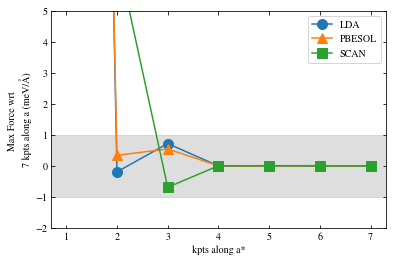

In [13]:
fig, ax = plt.subplots()

kpts_ab = range(1,8)
encut = 600

kpt_runs = {}

for xc in functionals:
    maxforces_kpts = []
    
    for ka in kpts_ab:
        # get kpoints in c direction (shorter)
        kc = round(1.5*ka)
        kpts = (ka, ka, kc)
        
        U_Mn = reasonable_Ueffs[xc]
        print(f"xc: {xc}, kpts: {kpts}")
        directory = f'{basedir}/{xc}/kpts-{ka}x{ka}x{kc}/geom-1/'
        run = Vasprun(directory + 'vasprun.xml', parse_potcar_file=False, exception_on_bad_xml=False)
        forces = run.ionic_steps[0]['forces']
        max_force = 1000*np.linalg.norm(forces, axis=1).max() # convert to meV/A
        maxforces_kpts.append(max_force)
                
    # plot !    
    ax.plot(kpts_ab,
            np.array(maxforces_kpts) - maxforces_kpts[-1],
            marker=markers[xc], color=colours[xc],
            label=f'{xc}'.upper())
    
ax.set_xlabel('kpts along a*')
ax.set_ylabel('Max Force wrt \n7 kpts along a (meV/Å)')
ax.axhspan(-1, 1, color='0.75', alpha=0.5)
ax.set_ylim([-2, 5])

ax.legend()